In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


In [8]:
import numpy as np
from numpy import trace as tr, exp, eye as I, kron
from numpy.random import randn, randint, choice

from numpy.linalg import eigh, inv

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib notebook

np.set_printoptions(precision=3, linewidth=500,  threshold=500, suppress=True, edgeitems=5)

In [3]:
import sys

sys.path.append('.')

In [4]:
%load_ext autoreload
%autoreload 2

In [8]:
def get_Y_and_S(Y_true, SNR=0, p=0.5, seed=0):
    
    sig_y = 10 ** (-SNR / 20)
    
    Y = Y_true + sig_y * randn(*Y_true.shape)
    
    S = choice(2, size=Y_true.shape, p=[1-p, p]).astype(bool)
    
    Y[S] = 0
    
    Y_nan = Y.copy()
    
    Y_nan[S] = np.nan
    
    return Y_nan, Y, S
    
    

0.6597539553864471

<IPython.core.display.Javascript object>


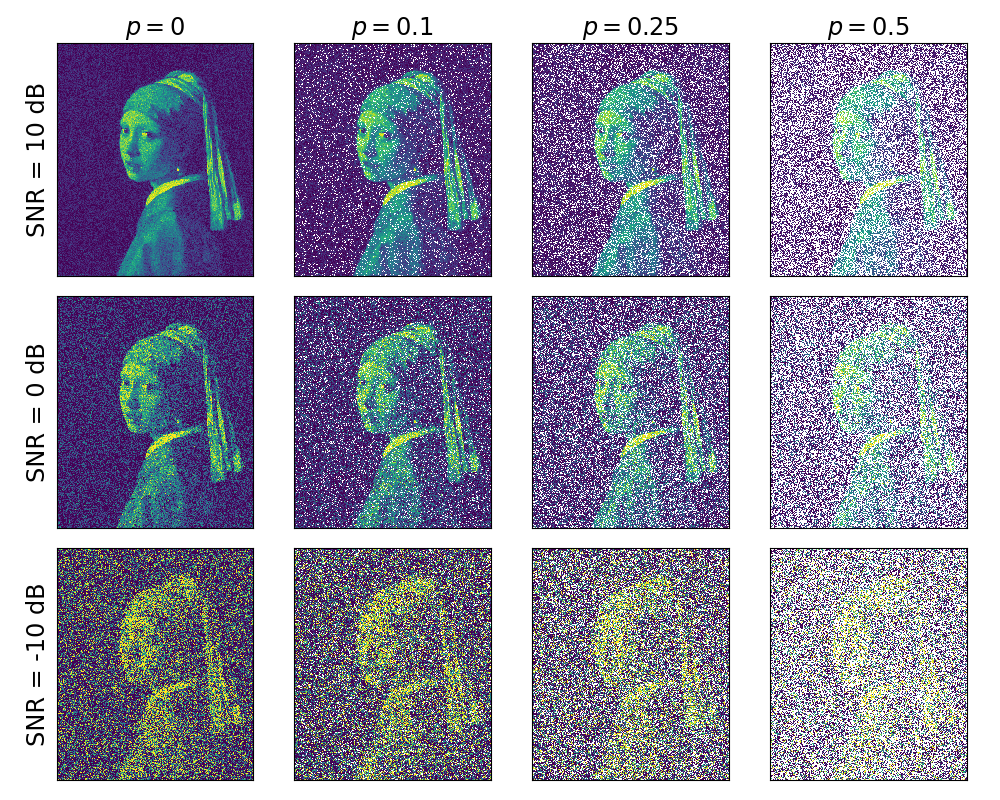

<IPython.core.display.Javascript object>


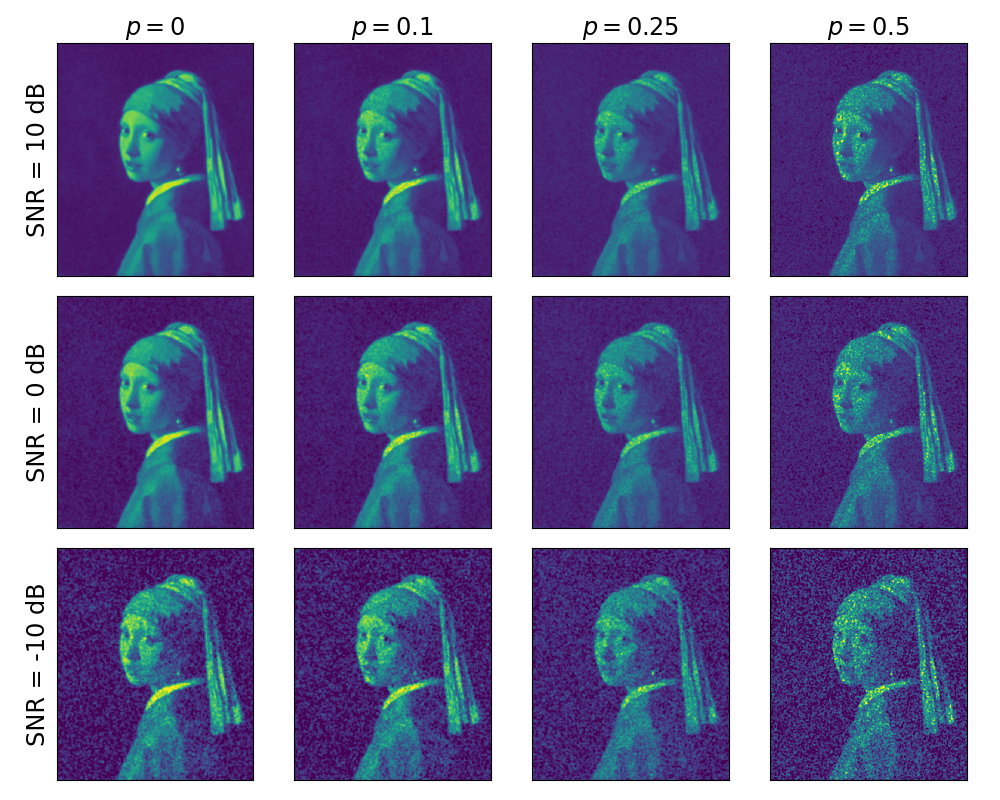

In [74]:
fig1, axes1 = plt.subplots(ncols=4, nrows=3, sharex=True, sharey=True, figsize=(10, 8))
fig2, axes2 = plt.subplots(ncols=4, nrows=3, sharex=True, sharey=True, figsize=(10, 8))

for i, snr in enumerate([10, 0, -10]):
    
    for j, p in enumerate([0, 0.1, 0.25, 0.5]):
        
        beta = 2
        gamma = [1, 0.85, 0.75, 0.2][j]

        Lam = lamN[:, None] + lamT[None, :]

        G = np.exp(- beta * Lam)
        
        Y_nan, Y, S = get_Y_and_S(Y_true, SNR=snr, p=p)
        
        solver = CGMFSolver(UT, UN, G, S, gamma)
        
        F = solver.solve(Y)
        
        axes1[i, j].imshow(Y_nan,  interpolation='nearest', vmin=Y_true.min(), vmax=Y_true.max())
        axes2[i, j].imshow(F,  interpolation='nearest', vmin=Y_true.min(), vmax=Y_true.max())

        for ax in [axes1[i, j], axes2[i, j]]:
            
            ax.set_xticks([])
            ax.set_yticks([])
        
for ax, title in zip(axes1[0, :], ['$p=0$', '$p=0.1$', '$p=0.25$', '$p=0.5$']):
    ax.set_title(title, size='xx-large', )

for ax, title in zip(axes1[:, 0], [r'SNR = 10 dB', 'SNR = 0 dB', 'SNR = -10 dB']):
    ax.set_ylabel(title,  size='xx-large', labelpad=5)
    
for ax, title in zip(axes2[0, :], ['$p=0$', '$p=0.1$', '$p=0.25$', '$p=0.5$']):
    ax.set_title(title, size='xx-large',)

for ax, title in zip(axes2[:, 0], [r'SNR = 10 dB', 'SNR = 0 dB', 'SNR = -10 dB']):
    ax.set_ylabel(title,  size='xx-large', labelpad=5)
    
fig1.tight_layout()
fig2.tight_layout()

In [76]:
fig2.savefig('outputs.jpg')

In [69]:
ax.set_title('AAA', size='xx-large')

Text(0.5, 1.0, 'AAA')

In [73]:
ax.set_ylabel('aaaaa',  size='xx-large', labelpad=5)

Text(40.99585735181244, 0.5, 'aaaaa')